<a href="https://colab.research.google.com/github/ayushrag1/Stock_Prediction-Using-Facebook-prophet/blob/main/AMAZON_Notebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

[link text](https:// [link text](https://))

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df=pd.read_csv("/content/AMZN.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-21,173.820999,174.100006,171.699997,172.697998,172.697998,65542000
1,2021-06-22,172.903000,176.188995,172.804504,175.272003,175.272003,66902000
2,2021-06-23,175.250000,176.050003,174.160004,175.190994,175.190994,56266000
3,2021-06-24,175.382004,176.242996,171.542496,172.453995,172.453995,76640000
4,2021-06-25,173.199997,173.240997,169.709000,170.072998,170.072998,78820000
...,...,...,...,...,...,...,...
247,2022-06-13,104.190002,106.540001,101.860001,103.669998,103.669998,99277700
248,2022-06-14,104.190002,104.879997,101.430000,102.309998,102.309998,69728800
249,2022-06-15,103.860001,109.059998,103.529999,107.669998,107.669998,85011100
250,2022-06-16,104.470001,104.580002,102.010002,103.660004,103.660004,82186300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.246526,160.233546,156.024558,158.060157,158.060157,7.343428e+07
std,20.908451,20.604637,21.240131,20.970118,20.970118,3.239562e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,3.360600e+07
25%,151.354874,153.974754,148.683876,151.136997,151.136997,5.311950e+07
50%,165.186501,166.381248,163.809250,164.975998,164.975998,6.525300e+07
75%,172.013249,173.607254,170.149994,172.197754,172.197754,8.497128e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.726620e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.bar(df,y="Close")

In [ ]:
px.box(df,y="Close")

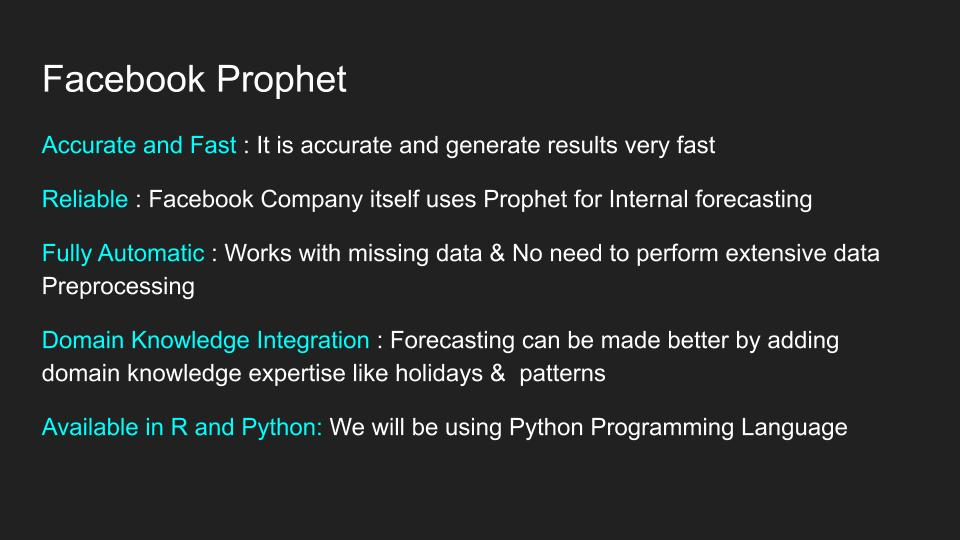

## Data Preperation

In [ ]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)
ndf

,Date,Close
0,2021-06-21,172.697998
1,2021-06-22,175.272003
2,2021-06-23,175.190994
3,2021-06-24,172.453995
4,2021-06-25,170.072998
...,...,...
247,2022-06-13,103.669998
248,2022-06-14,102.309998
249,2022-06-15,107.669998
250,2022-06-16,103.660004


In [ ]:
  prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})
  prophet_df

,ds,y
0,2021-06-21,172.697998
1,2021-06-22,175.272003
2,2021-06-23,175.190994
3,2021-06-24,172.453995
4,2021-06-25,170.072998
...,...,...
247,2022-06-13,103.669998
248,2022-06-14,102.309998
249,2022-06-15,107.669998
250,2022-06-16,103.660004


In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Creating Facebook Prophet Model

##Forecasting

In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-21,174.990504,163.853321,187.121999,174.990504,174.990504,0.386005,0.386005,0.386005,0.386005,0.386005,0.386005,0.0,0.0,0.0,175.376509
1,2021-06-22,174.941776,165.199755,187.654883,174.941776,174.941776,0.912195,0.912195,0.912195,0.912195,0.912195,0.912195,0.0,0.0,0.0,175.853971
2,2021-06-23,174.893048,164.379096,187.220087,174.893048,174.893048,0.902813,0.902813,0.902813,0.902813,0.902813,0.902813,0.0,0.0,0.0,175.795861
3,2021-06-24,174.844320,164.753401,187.019407,174.844320,174.844320,0.548897,0.548897,0.548897,0.548897,0.548897,0.548897,0.0,0.0,0.0,175.393217
4,2021-06-25,174.795592,163.377178,186.273084,174.795592,174.795592,-0.132811,-0.132811,-0.132811,-0.132811,-0.132811,-0.132811,0.0,0.0,0.0,174.662781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-07-13,89.582882,79.357727,101.048184,88.969991,90.323613,0.902813,0.902813,0.902813,0.902813,0.902813,0.902813,0.0,0.0,0.0,90.485694
278,2022-07-14,89.005944,78.538446,100.914866,88.349496,89.794030,0.548897,0.548897,0.548897,0.548897,0.548897,0.548897,0.0,0.0,0.0,89.554841
279,2022-07-15,88.429007,77.695696,99.932620,87.732410,89.275388,-0.132811,-0.132811,-0.132811,-0.132811,-0.132811,-0.132811,0.0,0.0,0.0,88.296196
280,2022-07-16,87.852069,75.416096,98.085280,87.095803,88.747763,-1.308550,-1.308550,-1.308550,-1.308550,-1.308550,-1.308550,0.0,0.0,0.0,86.543519


In [ ]:
px.line(forecast,x="ds",y="yhat")

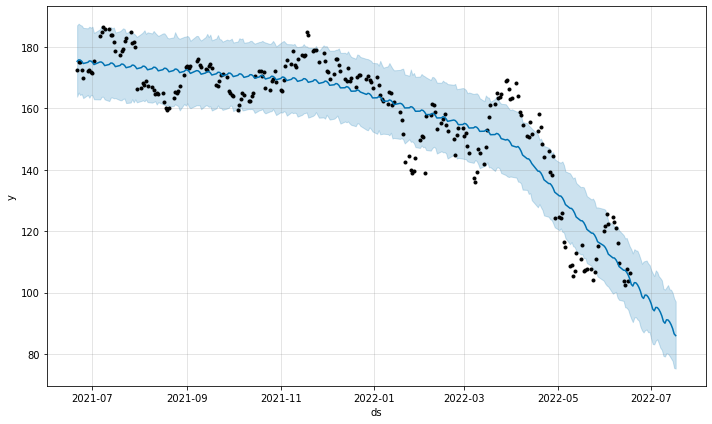

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

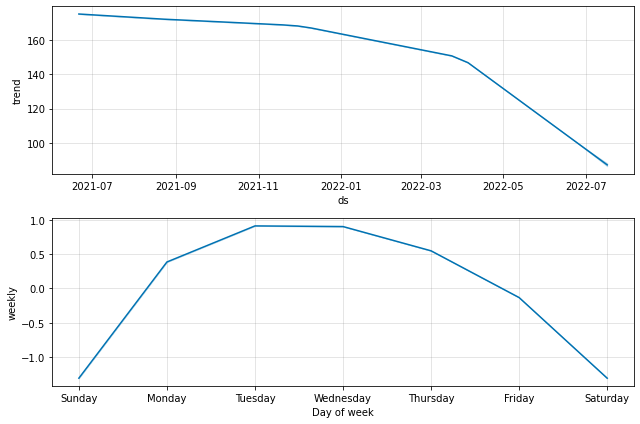

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>